In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv('../data/Churn_Modelling.csv')
print(df.head())
print(df.info())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [72]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [73]:
#the average age of customers grouped by their geographical location.
avg_age_by_geo = df.groupby("Geography")["Age"].mean()
print(avg_age_by_geo)

Geography
France     38.511767
Germany    39.771622
Spain      38.890997
Name: Age, dtype: float64


In [74]:
#how many customers are male or female.
gender_dist = df["Gender"].value_counts()
print(gender_dist)

Gender
Male      5457
Female    4543
Name: count, dtype: int64


In [75]:
#shows the average account balance of customers based on whether they exited the bank or not. 
balance_by_exited = df.groupby("Exited")["Balance"].mean()
print(balance_by_exited)

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64


In [76]:
#how many customers own 1, 2, or more bank products.
products_dist = df["NumOfProducts"].value_counts()
print(products_dist)

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


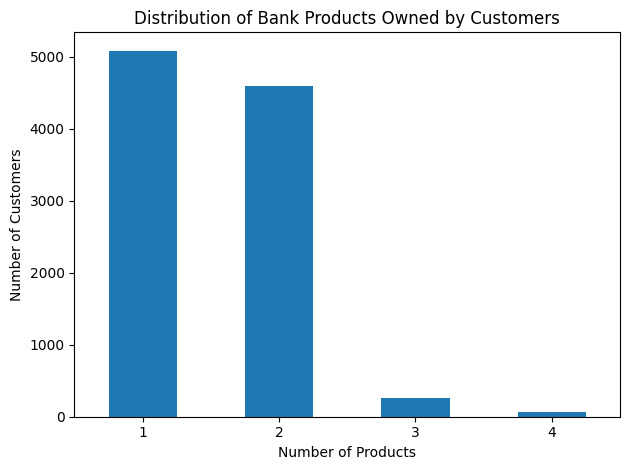

In [77]:
products_dist.plot(kind="bar")
plt.title("Distribution of Bank Products Owned by Customers")
plt.xlabel("Number of Products")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [78]:
#the average income of active vs inactive customers.
salary_by_active = df.groupby("IsActiveMember")["EstimatedSalary"].mean()
print(salary_by_active)

IsActiveMember
0    100767.203854
1     99452.965894
Name: EstimatedSalary, dtype: float64


In [79]:
#This aggregates total balance values per region, helping identify areas with high financial value.
total_balance_by_geo = df.groupby("Geography")["Balance"].sum()
print(total_balance_by_geo)

Geography
France     3.113325e+08
Germany    3.004029e+08
Spain      1.531236e+08
Name: Balance, dtype: float64


In [80]:
#Top 5 Ages by Exit Count. Age groups with the highest number of customer exit
top_age_exited = df[df["Exited"] == 1].groupby("Age")["CustomerId"].count().nlargest(5)
print(top_age_exited)

Age
46    91
40    89
43    88
45    87
48    80
Name: CustomerId, dtype: int64


In [81]:
#It breaks down how many customers exited based on whether they had a credit card.
exited_by_card = df.groupby("HasCrCard")["Exited"].value_counts()
print(exited_by_card)

HasCrCard  Exited
0          0         2332
           1          613
1          0         5631
           1         1424
Name: count, dtype: int64


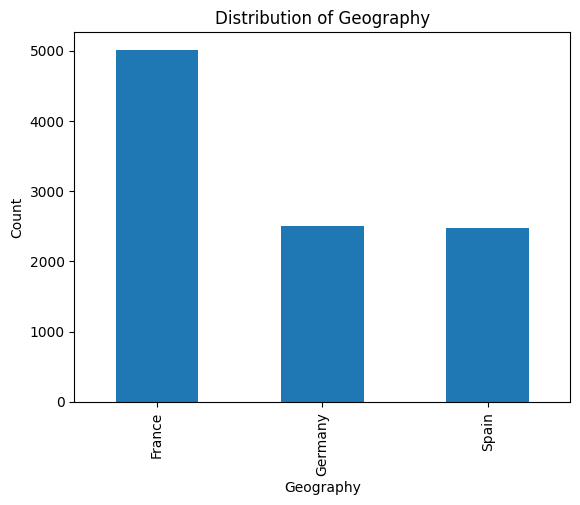

In [82]:
df["Geography"].value_counts().plot(kind="bar")
plt.title("Distribution of Geography")
plt.ylabel("Count")
plt.show()

In [83]:
#how long customers stay with the bank, based on gender.
tenure_by_gender = df.groupby("Gender")["Tenure"].mean()
print(tenure_by_gender)

Gender
Female    4.966102
Male      5.051677
Name: Tenure, dtype: float64


In [84]:
#Exit Rate by Region (as Percentage)
credit_by_exited = df.groupby("Exited")["CreditScore"].mean()
print(credit_by_exited)

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64


In [85]:
#shows the average credit score of customers who exited vs.
credit_by_exited = df.groupby("Exited")["CreditScore"].mean()
print(credit_by_exited)

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64


In [86]:
# Average Number of Products by Activity
products_by_active = df.groupby("IsActiveMember")["NumOfProducts"].mean()
print(products_by_active)

IsActiveMember
0    1.524438
1    1.535624
Name: NumOfProducts, dtype: float64


In [87]:
#Customer Count in Age Ranges.
age_bins = pd.cut(df["Age"], bins=[0, 30, 50, 70, 100])
age_dist = df.groupby(age_bins, observed=False)["CustomerId"].count()
print(age_dist)

Age
(0, 30]      1968
(30, 50]     6771
(50, 70]     1128
(70, 100]     133
Name: CustomerId, dtype: int64


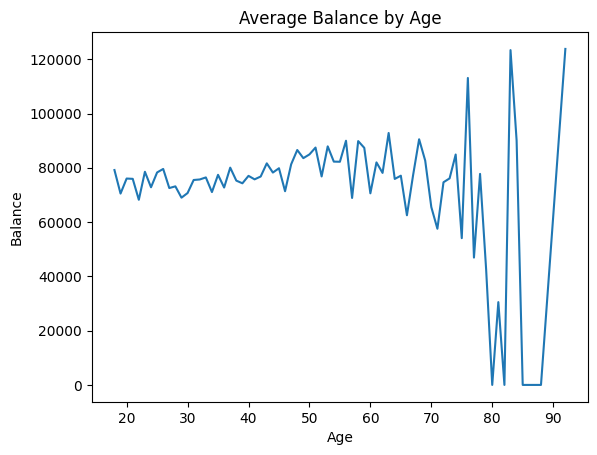

In [88]:
df.groupby("Age")["Balance"].mean().plot(kind="line")
plt.title("Average Balance by Age")
plt.ylabel("Balance")
plt.show()

In [89]:
#compares the average income of customers who left vs.
salary_by_exited = df.groupby("Exited")["EstimatedSalary"].mean()
print(salary_by_exited)

Exited
0     99738.391772
1    101465.677531
Name: EstimatedSalary, dtype: float64


In [90]:
#how many active customers exist in each region. 
active_by_geo = df[df["IsActiveMember"] == 1].groupby("Geography")["CustomerId"].count()
print(active_by_geo)

Geography
France     2591
Germany    1248
Spain      1312
Name: CustomerId, dtype: int64


In [91]:
#Top 10 Surnames Among Exited Customers
top_surnames_exited = df[df["Exited"] == 1].groupby("Surname")["CustomerId"].count().nlargest(10)
print(top_surnames_exited)

Surname
Lin         9
Martin      9
McGregor    9
Smith       9
Cocci       7
Lo          7
Ma          7
Manna       7
Shih        7
Wang        7
Name: CustomerId, dtype: int64


In [92]:
#how many males and females exited or stayed.
exited_by_gender = df.groupby("Gender")["Exited"].value_counts()
print(exited_by_gender)

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: count, dtype: int64


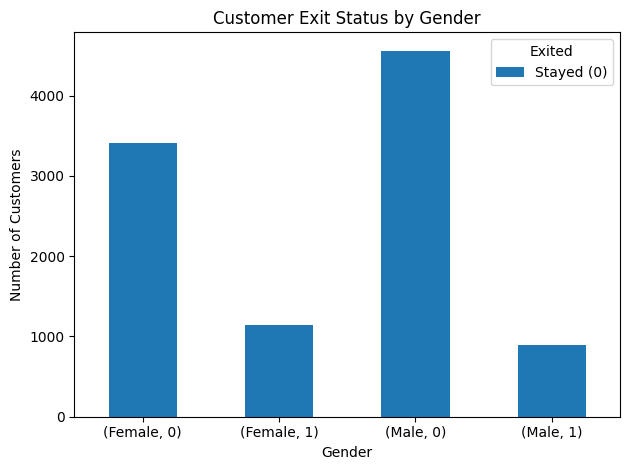

In [93]:
exited_by_gender.plot(kind="bar")
plt.title("Customer Exit Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Exited", labels=["Stayed (0)", "Exited (1)"])
plt.tight_layout()
plt.show()

In [94]:
#Average Credit Score by Region
credit_by_geo = df.groupby("Geography")["CreditScore"].mean()
print(credit_by_geo)

Geography
France     649.668329
Germany    651.453567
Spain      651.333872
Name: CreditScore, dtype: float64


In [95]:
#how often customers exit the bank based on how long they’ve been customers.
tenure_by_exited = df.groupby("Tenure")["Exited"].value_counts()
print(tenure_by_exited.head())

Tenure  Exited
0       0         318
        1          95
1       0         803
        1         232
2       0         847
Name: count, dtype: int64


In [96]:
#Number of Customers with Zero Balance
zero_balance = len(df[df["Balance"] == 0])
print(f"Customers with Zero Balance: {zero_balance}")

Customers with Zero Balance: 3617


In [97]:
#xit Rate by Product Count
exit_rate_by_products = df[df["Exited"] == 1].groupby("NumOfProducts")["CustomerId"].count() / df.groupby("NumOfProducts")["CustomerId"].count() * 100
print(exit_rate_by_products)

NumOfProducts
1     27.714398
2      7.581699
3     82.706767
4    100.000000
Name: CustomerId, dtype: float64


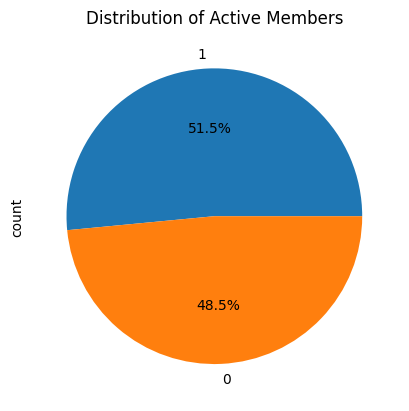

In [98]:
df["IsActiveMember"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Distribution of Active Members")
plt.show()

In [99]:
#average customer income per region 
salary_by_geo = df.groupby("Geography")["EstimatedSalary"].mean()
print(salary_by_geo)

Geography
France      99899.180814
Germany    101113.435102
Spain       99440.572281
Name: EstimatedSalary, dtype: float64


In [100]:
#how credit card ownership correlates with customer activity levels.
active_by_card = df.groupby("HasCrCard")["IsActiveMember"].value_counts()
print(active_by_card)

HasCrCard  IsActiveMember
0          1                 1544
           0                 1401
1          1                 3607
           0                 3448
Name: count, dtype: int64


In [101]:
#his totals the account balances held by males vs females.
total_balance_by_gender = df.groupby("Gender")["Balance"].sum()
print(total_balance_by_gender)

Gender
Female    3.437205e+08
Male      4.211384e+08
Name: Balance, dtype: float64


In [102]:
#Top 5 Ages by Estimated Salary
top_age_salary = df.groupby("Age")["EstimatedSalary"].mean().nlargest(5)
print(top_age_salary)

Age
84    187360.250000
82    182055.360000
79    152474.975000
71    121040.188889
68    117195.776842
Name: EstimatedSalary, dtype: float64


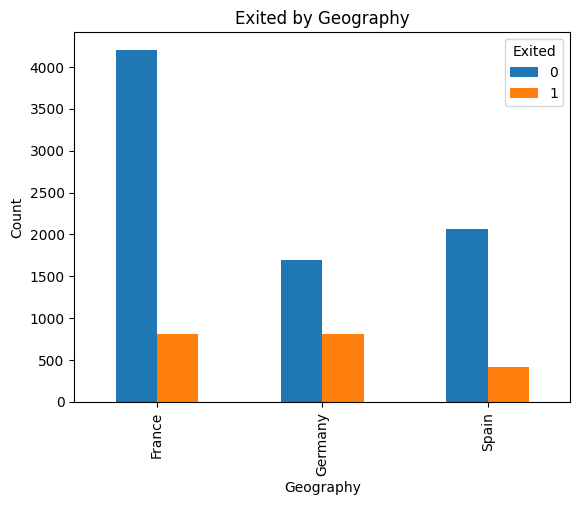

In [103]:
df.groupby("Geography")["Exited"].value_counts().unstack().plot(kind="bar")
plt.title("Exited by Geography")
plt.ylabel("Count")
plt.show()

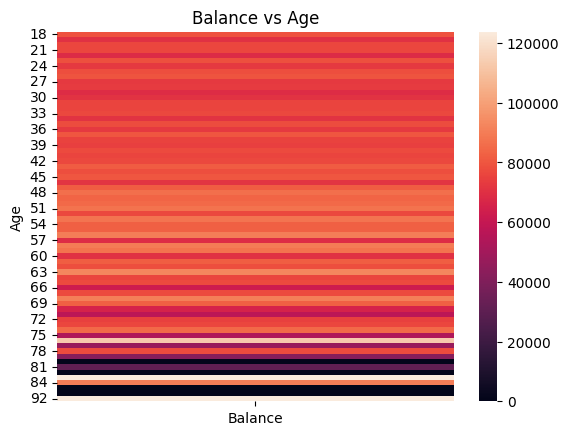

In [104]:
pivot = df.pivot_table(values="Balance", index="Age", aggfunc="mean")
sns.heatmap(pivot)
plt.title("Balance vs Age")
plt.show()